In [104]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

% matplotlib inline

In [105]:
iris = sns.load_dataset('iris')
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
137,6.4,3.1,5.5,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa
47,4.6,3.2,1.4,0.2,setosa


In [106]:
columns=['sepal_length','species']
species=['setosa','virginica']

In [107]:
iris=iris[columns]
iris=iris.loc[iris['species'].isin(species)]
iris.sample(3)

,sepal_length,species
118,7.7,virginica
131,7.9,virginica
20,5.4,setosa


In [108]:
encoder = LabelEncoder()
encoder.fit(iris['species'])
list(encoder.classes_)

['setosa', 'virginica']

In [109]:
transformed=encoder.transform(iris['species'])
iris['species']=transformed


In [110]:
iris.sample(3)

,sepal_length,species
102,7.1,1
17,5.1,0
107,7.3,1


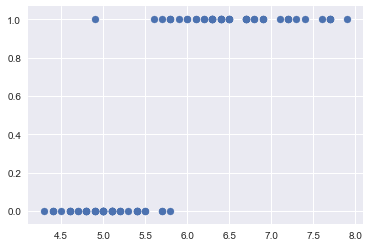

In [111]:
plt.scatter(iris['sepal_length'],iris['species'])
plt.show()

In [112]:
def logit(x):
    return (np.log(x)-np.log(1-x))

In [113]:
def logistic(x,max_length=1,steepness=1):
    #mid=np.mean(x)
    mid=np.mean(x)
    return max_length/(1+np.exp(-steepness*(x-mid)))

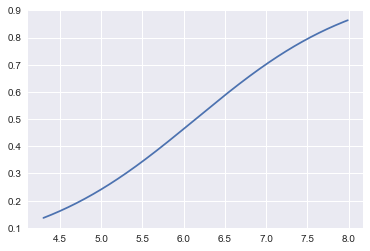

In [114]:
x = np.arange(4.3, 8, 0.01)
plt.plot(x,logistic(x))
plt.show()


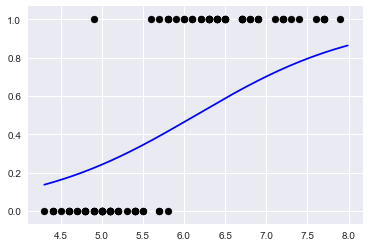

In [115]:
plt.scatter(iris['sepal_length'],iris['species'],color='black')
plt.plot(x,logistic(x),color='blue') # this is the logistic plot
plt.show()
#iris['sepal_length'][:20]

In [116]:
X=np.asmatrix(iris['sepal_length']).transpose()
y=np.asmatrix(iris['species']).transpose()

In [117]:
lr=LogisticRegression()
lr.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
beta0=lr.intercept_
beta0

array([-4.11618943])

In [119]:
beta1=lr.coef_
beta1

array([[ 0.74360247]])

In [120]:
def predict_prob(x):
    exponent = np.exp(beta0[0] + beta1[0] * x)
    return exponent / (1 + exponent)

In [121]:
def odds(x):
    return x / (1 - x)


##### displaying the results


In [125]:
from IPython.display import display
import prettytable as pt

from IPython.core.display import display, HTML

table = pt.PrettyTable(['sepal_length', '$\hat{p}$', '$1 - \hat{p}$', 'odds'])
part=iris.sample(15)
p=predict_prob(part['sepal_length'])
part['p']=np.round(p,2)

for SL,F,P in part.values: 
       table.add_row([SL,P, 1-P, odds(P)])
display(HTML(table.get_html_string()))
# as the value of sepal_length increases it tell that the iris is more of virginica

sepal_length,$\hat{p}$,$1 - \hat{p}$,odds
6.3,0.64,0.36,1.77777777778
7.3,0.79,0.21,3.7619047619
5.9,0.57,0.43,1.32558139535
6.4,0.66,0.34,1.94117647059
6.5,0.67,0.33,2.0303030303
4.9,0.38,0.62,0.612903225806
4.3,0.29,0.71,0.408450704225
5.0,0.4,0.6,0.666666666667
4.8,0.37,0.63,0.587301587302
5.0,0.4,0.6,0.666666666667
